# Machine Learning Model Development & Evaluation Using Scikit Learn

## Types
### 1) Supervised Learning
####      - Regression
####      - Classification
### 2) Unsupervised Learning
####      - Clustering
####      - Association
####      - etc.

https://www.guru99.com/supervised-vs-unsupervised-learning.html

## Classification

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# necessary SKLearn items
from sklearn.datasets import load_iris, load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_curve, precision_recall_curve, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import scale, StandardScaler

Load the iris dataset

In [4]:
iris = sns.load_dataset('iris')

In [5]:
iris.head(10)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa

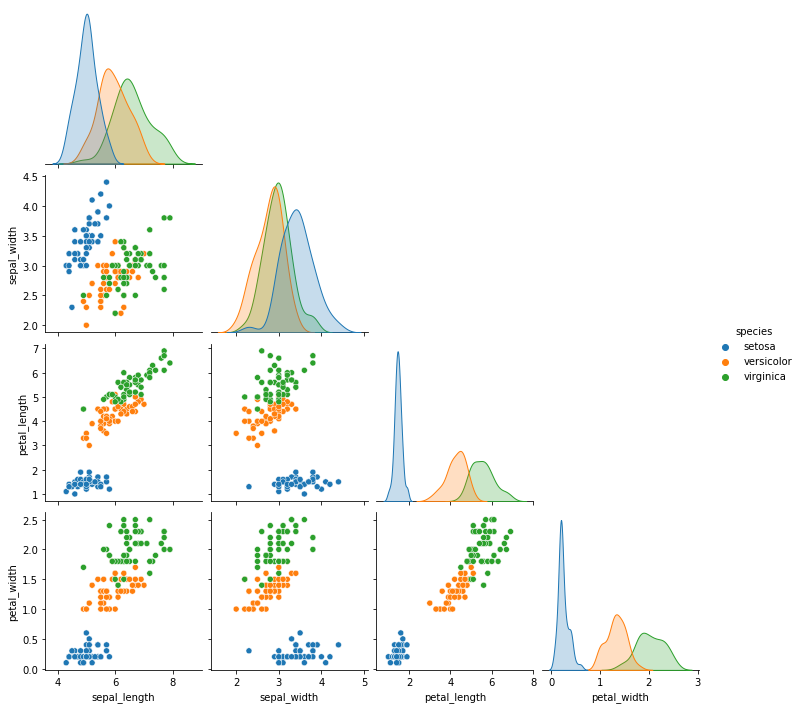

In [8]:
# make a pairplot, using 'species' as the hue
sns.pairplot(iris, hue='species',corner=True)

In [9]:
# check for null values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### KNN: K-nearest neigbors
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [10]:
# split the data
# prepare X and y first
X = iris.drop(['species'], axis=1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [11]:
# instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=8)

In [12]:
# fit it to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [14]:
# make predictions on the test data
y_pred = knn.predict(X_test)
print(y_pred)

['virginica' 'versicolor' 'virginica' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica' 'virginica'
 'setosa' 'setosa' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor']


In [16]:
# check the accuracy using the score method of the model
score = knn.score(X_train, y_train)

print("Score:", score)

Score: 0.9809523809523809


### How to choose the n_neighbors?
- Hyperparameter tuning
https://www.jeremyjordan.me/hyperparameter-tuning/

First, we need to know about validation set. <br>
We will split our data into 3 partitions now:
1) Training set <br>
2) Validation set <br>
3) Test set <br>

#### We will use an advanced technique called k-fold cross validation for hyperparameter tuning. We will use grid search to find the best hyperparameter.

In [17]:
# specify the hyperparameter(s) as a dictionary
param_grid = {'n_neighbors': np.arange(1, 20)}

#### We will be trying all the possible values from 1 to 20.

In [18]:
# instantiate the classifier
knn = KNeighborsClassifier()

##### Note that we did not specify n_neighbors while instantiating the classfier

### Instead, we will instantiate a grid search CV model, and use it to find the best hyperparameters
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [19]:
# use GridSeachCV and pass in the model, the grid to turn over, and the number of folds
knn_cv = GridSearchCV(knn, param_grid, cv=5)

In [20]:
# fit and permord the grid search
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [21]:
bp = knn_cv.best_params_
bs = round(knn_cv.best_score_, 2)

print(f'Best Parameters: {bp}\nBest Score: {bs}')

Best Parameters: {'n_neighbors': 3}
Best Score: 0.97


In [22]:
# make predictions on the test data
y_pred = knn_cv.predict(X_test)

# check the accuracy using the score method of the model
score = knn_cv.score(X_test, y_test)
print("Score:", score)

Score: 0.9777777777777777


## Let's move on to a more difficult dataset.

### Heart Disease Prediction

In [23]:
df = pd.read_csv("heart.csv")
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [24]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

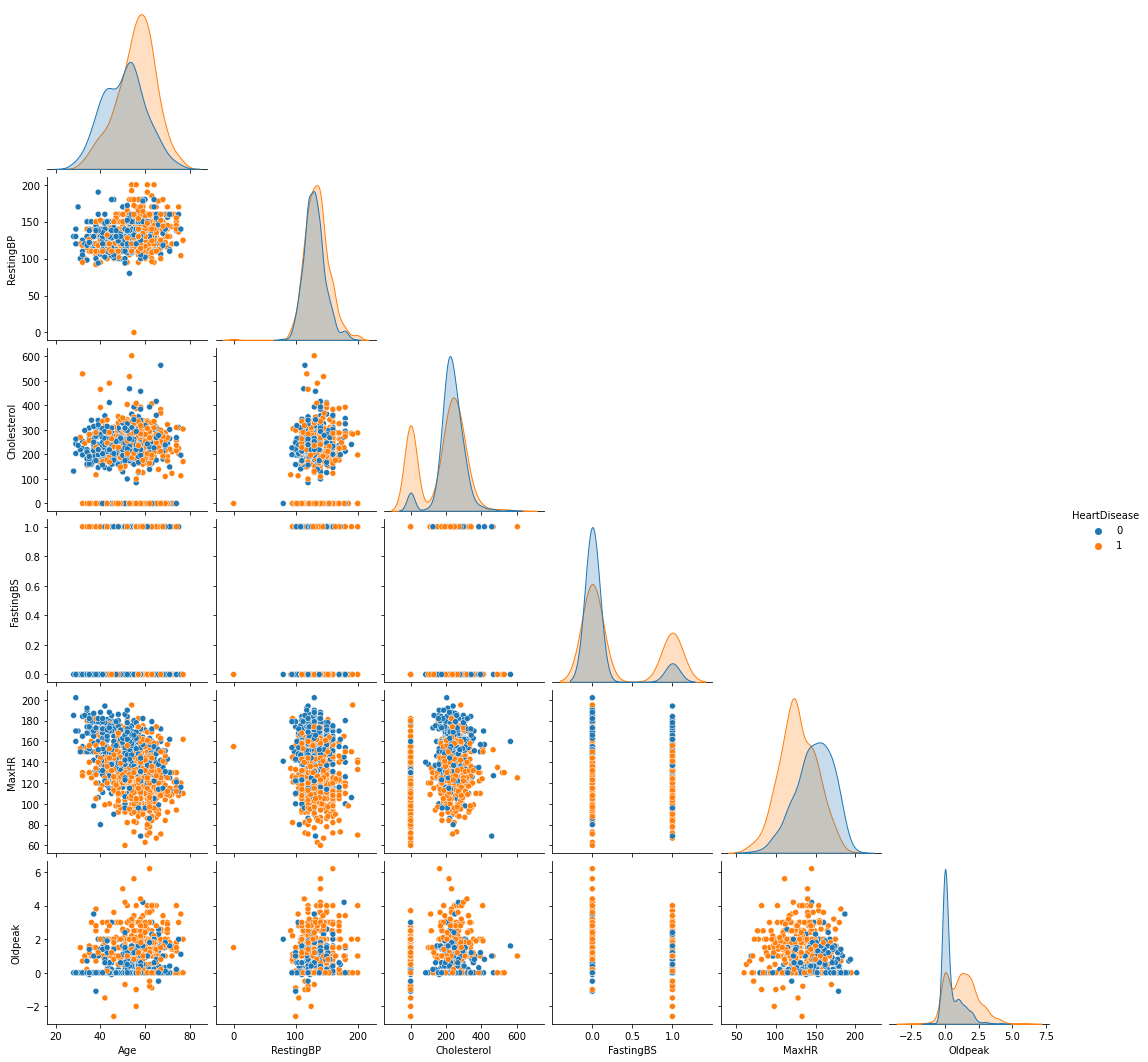

In [28]:
# make a pairplot like before
sns.pairplot(df, hue='HeartDisease', corner=True)

In [49]:
# check for null
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

###### Split dataset

In [50]:
# split the dataset
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                     random_state=21, stratify=y)

In [51]:
X_train.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
844   52   M            TA        118          186          0        LVH   
598   55   M           ASY        120          226          0        LVH   
338   63   M           ASY        140            0          1        LVH   
279   54   F           ATA        130          253          0         ST   
375   73   F           NAP        160            0          0         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  
844    190              N      0.0     Flat  
598    127              Y      1.7     Down  
338    149              N      2.0       Up  
279    155              N      0.0       Up  
375    121              N      0.0       Up

### Label Encoding

In [52]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [53]:
categorical_col = df.select_dtypes("object").columns.tolist()

In [54]:
categorical_col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [55]:
from sklearn.preprocessing import LabelEncoder
lb_encoders = {}

In [56]:
# fit_transform X_train, transform X_test using label encoding
for col in categorical_col:
    lb_encoders[col] = LabelEncoder()
    X_train[col] = lb_encoders[col].fit_transform(X_train[col])
    X_test[col] = lb_encoders[col].transform(X_test[col])

C:\Users\user\AppData\Local\Temp/ipykernel_1704/2280614682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = lb_encoders[col].fit_transform(X_train[col])
C:\Users\user\AppData\Local\Temp/ipykernel_1704/2280614682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = lb_encoders[col].transform(X_test[col])


In [57]:
X_train.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
844   52    1              3        118          186          0           0   
598   55    1              0        120          226          0           0   
338   63    1              0        140            0          1           0   
279   54    0              1        130          253          0           2   
375   73    0              2        160            0          0           2   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
844    190               0      0.0         1  
598    127               1      1.7         0  
338    149               0      2.0         2  
279    155               0      0.0         2  
375    121               0      0.0         2

In [58]:
X_test.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
305   51    0              0        120            0          1           1   
857   53    0              0        130          264          0           0   
661   49    1              2        118          149          0           0   
91    39    1              0        130          307          0           1   
374   61    1              0        125            0          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
305    127               1      1.5         2  
857    143               0      0.4         1  
661    126               0      0.8         2  
91     140               0      0.0         2  
374    105               1      0.0         0

## Feature Scaling
https://www.enjoyalgorithms.com/blog/need-of-feature-scaling-in-machine-learning

#### Normalization
![norm](norm.png)

#### Stadardization
![standard](standard.png)

- Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

- Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5]

array([[-0.17046739,  0.51740017,  2.32392821, -0.7833037 , -0.12667231,
        -0.55741751, -1.57381939,  2.09360408, -0.80357944, -0.83945346,
        -0.59629696],
       [ 0.15036098,  0.51740017, -0.81551346, -0.67302367,  0.24416217,
        -0.55741751, -1.57381939, -0.38463577,  1.24443204,  0.75123754,
        -2.25418321],
       [ 1.0059033 ,  0.51740017, -0.81551346,  0.42977658, -1.85105263,
         1.7939874 , -1.57381939,  0.48078132, -0.80357944,  1.03194772,
         1.06158929],
       [ 0.04341819, -1.93273999,  0.2309671 , -0.12162354,  0.49447544,
        -0.55741751,  1.60850411,  0.71680416, -0.80357944, -0.83945346,
         1.06158929],
       [ 2.0753312 , -1.93273999,  1.27744765,  1.53257684, -1.85105263,
        -0.55741751,  1.60850411, -0.62065862, -0.80357944, -0.83945346,
         1.06158929]])

In [61]:
# specify the hyperparameter(s) as a dictionary
param_grid = {'n_neighbors': np.arange(1, 40)}

# instantiate the classifier
knn = KNeighborsClassifier()

# use GridSearchCV and pass in the model, the grid to turn over, and the number of folds
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# fit and permord the grid search
knn_cv.fit(X_train, y_train)

bp = knn_cv.best_params_
bs = round(knn_cv.best_score_, 2)

print(f'Best Parameters: {bp}\nBest Score: {bs}')

Best Parameters: {'n_neighbors': 13}
Best Score: 0.85


In [62]:
# make predictions on the test data
y_pred = knn_cv.predict(X_test)

# check the accuracy using the score method of the model
score = knn_cv.score(X_test, y_test)
print("Score:", score)

Score: 0.8804347826086957


### Is accuracy the correct measure here?

##### Let's see the confusion matrix first

In [63]:
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_curve, precision_recall_curve, roc_auc_score, accuracy_score

![conf](conf.png)

In [64]:
confusion_matrix(y_test, y_pred, labels=[1, 0]).T

array([[88,  8],
       [14, 74]], dtype=int64)

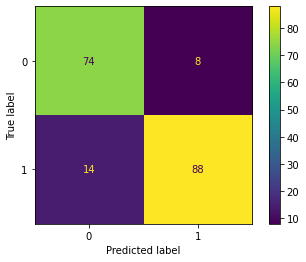

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

### Accuracy

- Accuracy = (TP+TN)/(TP+FP+FN+TN)

When to use?
Accuracy is a valid choice of evaluation for classification problems which are well balanced and not skewed or No class imbalance.

### Precision
- Precision = (TP)/(TP+FP)

Precision is a valid choice of evaluation metric when we want to be very sure of our prediction.

#### Example: In spam email detection, we want to minimize false positives. Hence, precision is the desired metric to optimize.

### Recall

- Recall = (TP)/(TP+FN)

Recall is a valid choice of evaluation metric when we want to capture as many positives as possible. For example: If we are building a system to predict if a person has cancer or not, we want to capture the disease even if we are not very sure.
#### Example: In heart disease detection, we want to minimize false negatives. Hence, recall is the desired metric to optimize.

###  F1 Score

- F1 = 2 * Precision * Recall / (Precision+Recall)

#####  Simply stated the F1 score sort of maintains a balance between the precision and recall for your classifier. If your precision is low, the F1 is low and if the recall is low again your F1 score is low.

If you are a police inspector and you want to catch criminals, you want to be sure that the person you catch is a criminal (Precision) and you also want to capture as many criminals (Recall) as possible. The F1 score manages this tradeoff.

#####  What if we want to give priority to either precision or recall

![beta](beta_score.png)

In [66]:
from sklearn.metrics import precision_recall_fscore_support

# precision_recall_fscore_support(y_test, y_pred)
print(f'{classification_report(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        82
           1       0.92      0.86      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [67]:
from sklearn.metrics import recall_score

# instantiate the classifier
knn = KNeighborsClassifier()

# use GridSeachCV and pass in the model, the grid to turn over, and the number of folds
knn_cv2 = GridSearchCV(knn, param_grid, cv=5, scoring='recall')

# fit and permord the grid search
knn_cv2.fit(X_train, y_train)

bp = knn_cv2.best_params_
bs = round(knn_cv2.best_score_, 2)

print(f'Best Parameters: {bp}\nBest Score: {bs}')

Best Parameters: {'n_neighbors': 7}
Best Score: 0.86


In [69]:
# make predictions
y_pred2 = knn_cv2.predict(X_test)

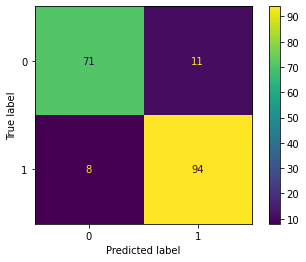

In [70]:
# print the classification report
cm = confusion_matrix(y_test, y_pred2)
ConfusionMatrixDisplay(cm).plot()

### SVM (Support Vector Machine)

![svml](svm_linear.webp)

![svmn](svm_nonlinear.webp)

![svmC](svm_C.png)

### 1) Bias vs Variance
### 2) Overfitting vs Underfitting
### 3) Regularization
https://www.simplilearn.com/tutorials/machine-learning-tutorial/regularization-in-machine-learning#:~:text=MLExplore%20Program-,What%20is%20Regularization%20in%20Machine%20Learning%3F,and%20prevent%20overfitting%20or%20underfitting.

In [73]:
from sklearn.svm import SVC

# instantiate the classifier
svc = SVC(verbose=True)

# specify the hyperparameter(s) as a dictionary
param_grid = {'C': np.logspace(-2, 3, 6), 'kernel': ['linear', 'rbf']}

# use GridSeachCV and pass in the model, the grid to turn over, and the number of folds
svc_cv = GridSearchCV(svc, param_grid, cv=5, scoring='f1')

# fit and permord the grid search
svc_cv.fit(X_train, y_train)

bp = svc_cv.best_params_
bs = round(svc_cv.best_score_, 2)

print(f'Best Parameters: {bp}\nBest Score: {bs}')

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Best Parameters: {'C': 10.0, 'kernel': 'rbf'}
Best Score: 0.88


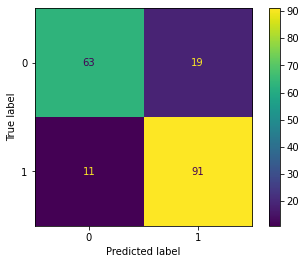

In [72]:
y_pred = svc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

###  Logisitic Regression

In [76]:
# instantiate the classifier
lr = LogisticRegression()

# specify the hyperparameter(s) as a dictionary
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'None'], 'C': np.logspace(-5, 8, 15), 'max_iter': range(200, 1000, 200), 
             'solver': ['lbfgs', 'liblinear', 'saga']}

# use GridSeachCV and pass in the model, the grid to turn over, and the number of folds,
# set recall as the scoring parameter
lr_cv = GridSearchCV(lr, param_grid, cv=5, scoring='recall')

# fit and permord the grid search
lr_cv.fit(X_train, y_train)

bp = lr_cv.best_params_
bs = round(lr_cv.best_score_, 2)

print(f'Best Parameters: {bp}\nBest Score: {bs}')

c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_valida

Best Parameters: {'C': 1e-05, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 1.0


c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.         1.         1.         0.81538693 1.
        nan        nan        nan        nan        nan        nan
        nan 0.         1.         1.         0.81538693 1.
        nan        nan        nan        nan        nan        nan
        nan 0.         1.         1.         0.81538693 1.
        nan        nan        nan        nan        nan        nan
        nan 0.         1.         1.         0.81538693 1.
        nan        nan        nan        nan        nan        nan
        nan 0.         1.         1.         0.81538693 1.
        nan        nan        nan        nan        nan        nan
        nan 0.         1.         1.         0.81538693 1.
        nan        nan        nan        nan        nan        nan
        nan 0.         0.8        1.         0.81538693 1.
        nan        nan        nan        na

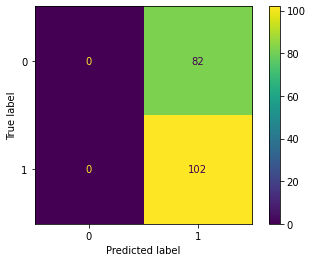

In [77]:
y_pred = lr_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [78]:
# let's make another GridSearchCV model, but this time, we will use 'f1' score instead of 'recall'
lr_cv2 = GridSearchCV(lr, param_grid, cv=5, scoring='f1')

# fit and permord the grid search
lr_cv2.fit(X_train, y_train)

bp = lr_cv2.best_params_
bs = round(lr_cv2.best_score_, 2)

print(f'Best Parameters: {bp}\nBest Score: {bs}')

c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_valida

Best Parameters: {'C': 0.05179474679231213, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.86


In [79]:
print(f'Best Parameters: {bp}\nBest Score: {bs}')

Best Parameters: {'C': 0.05179474679231213, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.86


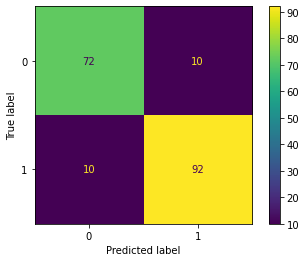

In [80]:
y_pred = lr_cv2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()